In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
# from matplotlib import rcParams
# from matplotlib.font_manager import FontProperties


In [38]:
# NAME = 'grid_ijcnn1'
# NAME = 'grid_ionosphere_scale'
# NAME = 'grid_a6a'
# NAME = 'grid_w6a'

# NAME = 'ionosphere_scale'


# NAME = 'ijcnn1'
# NAME = 'a6a'
# NAME = 'w6a'
# NAME = 'd=20'
# NAME = 'd=40'
# NAME = 'd=60'
# NAME = 'd=80'
NAME = 'd=100'

GRAPH = 'grid'
x_max_comm = 12000
x_max_grad = 4000

GRAPH = 'er'
x_max_comm = 8000
x_max_grad = 3000

plot = pickle.load(open('dump/'+GRAPH + '_' + NAME,'rb'))

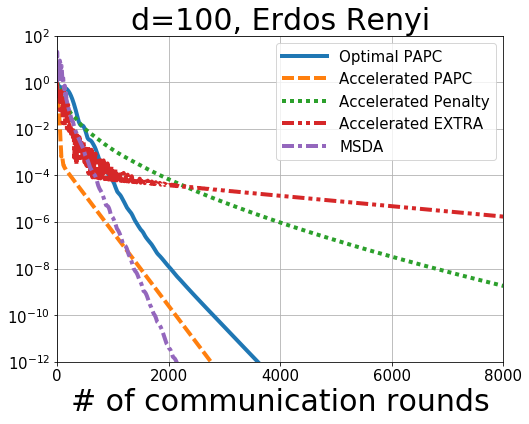

In [39]:
def make_plot(x,y,label,style):
    plt.plot(x,y,label=label,linewidth=4,linestyle=style)
    

plt.figure(figsize=(8,6))
plt.xlabel('# of communication rounds', fontsize=30)
#plt.ylabel('squared distance to the solution', fontsize=20)

make_plot(plot['alv_opt']['comm'],plot['alv_opt']['dist'], label='Optimal PAPC', style='solid')
make_plot(plot['alv']['comm'],plot['alv']['dist'], label='Accelerated PAPC', style=(0,(3,1)))
make_plot(plot['apm']['comm'],plot['apm']['dist'], label='Accelerated Penalty', style=(0,(1,1)))
make_plot(plot['cat']['comm'],plot['cat']['dist'], label='Accelerated EXTRA', style=(0, (3, 1, 1, 1, 1, 1)))
make_plot(plot['msda']['comm'],plot['msda']['dist'], label='MSDA', style=(0,(3,1,1,1)))

plt.legend(loc=1,handlelength=3,fontsize=15)
plt.yscale('log')
plt.xticks(range(0,20000,2000),fontsize=15)
plt.yticks([0.1 ** p for p in range(-4,20,2)],fontsize=15)
plt.xlim(0,x_max_comm)
plt.ylim(1e-12,100.)
plt.grid()

title = NAME
if GRAPH == 'er':
    title += ', Erdos Renyi' 
else:
    title += ', Grid' 
plt.title(title, fontsize=30)


plt.savefig('plot/{}_comm.pdf'.format(GRAPH + '_' + NAME), bbox_inches='tight')

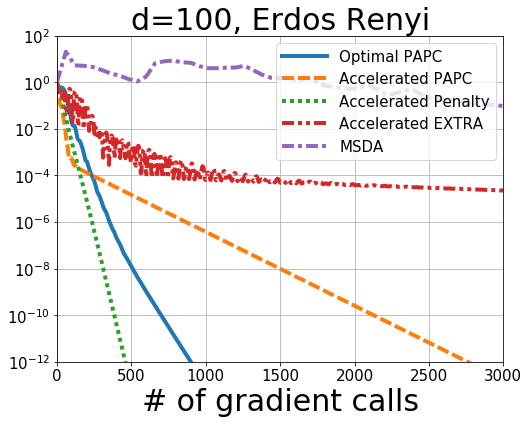

In [40]:
def make_plot(x,y,label,style):
    plt.plot(x,y,label=label,linewidth=4,linestyle=style)
    

plt.figure(figsize=(8,6))
plt.xlabel('# of gradient calls', fontsize=30)
#plt.ylabel('squared distance to the solution', fontsize=20)

make_plot(plot['alv_opt']['grad_eval'],plot['alv_opt']['dist'], label='Optimal PAPC', style='solid')
make_plot(plot['alv']['grad_eval'],plot['alv']['dist'], label='Accelerated PAPC', style=(0,(3,1)))
make_plot(plot['apm']['grad_eval'],plot['apm']['dist'], label='Accelerated Penalty', style=(0,(1,1)))
make_plot(plot['cat']['grad_eval'],plot['cat']['dist'], label='Accelerated EXTRA', style=(0, (3, 1, 1, 1, 1, 1)))
make_plot(plot['msda']['grad_eval'],plot['msda']['dist'], label='MSDA', style=(0,(3,1,1,1)))

plt.legend(loc=1,handlelength=3,fontsize=15)
plt.yscale('log')
plt.xticks(range(0,10000,500),fontsize=15)
plt.yticks([0.1 ** p for p in range(-4,20,2)],fontsize=15)
plt.xlim(0,x_max_grad)
plt.ylim(1e-12,100.)
plt.grid()
plt.title(title, fontsize=30)


plt.savefig('plot/{}_grad.pdf'.format(GRAPH + '_' + NAME), bbox_inches='tight')